In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import os

regions = {0: 'imgs', 1: 'caudate', 2: 'cerebellum', 3: 'frontal_lobe', 4: 'insula', 5: 'occipital_lobe', 6: 'parietal_lobe', 7: 'putamen', 8: 'temporal_lobe', 9: 'thalamus'}
root = '/media/leelabsg-storage1/yein/research/test/'

In [28]:
def pickel_load(root, epoch=None):

    map = dict()
    for _, v in regions.items():
        map[v] = {'pred_ages': [],
                 'true_ages': []}

    
    for cv_num in range(4):
        for content in ['pred_ages', 'true_ages']:
            pickel_path = os.path.join(root, str(cv_num), f'{content}.pickle')
            print(pickel_path)
            with open(pickel_path, 'rb') as file:
                curr_cv = pickle.load(file) # cv-split size의 dict (region: age)

            for _, v in regions.items():
                map[v][content].extend(curr_cv[v][0])

    return map

def age_plot(pred, true, region):
    # True Age vs. Predicted Age
    if region == 'imgs':
        region = 'global'
    plt.figure(figsize=(10, 7))
    plt.scatter(true, pred, alpha=0.2)
    plt.plot([min(true), max(true)], [min(true), max(true)], color='red')  # y=x line
    plt.title(f'{region} ========== True Age and Predicted Age')
    plt.xlabel('True_Age')
    plt.ylabel('Predicted_Age')


def age_plot_comparison(pred1, true1, pred2, true2, region):
    # before transfer learning
    if region == 'imgs':
        region = 'global'
    plt.figure(figsize=(15, 7))
    plt.subplot(1, 2, 1)
    plt.scatter(true1, pred1, alpha=0.2)
    plt.plot([min(true1), max(true1)], [min(true1), max(true1)], color='red')  # y=x line
    plt.title(f'Before Transfer Learning')
    plt.xlabel('True_Age')
    plt.ylabel('Predicted_Age')

    # after transfer learning
    plt.subplot(1, 2, 2)
    plt.scatter(true2, pred2, alpha=0.2)
    plt.plot([min(true2), max(true2)], [min(true2), max(true2)], color='red')  # y=x line
    plt.title(f'After Transfer Learning')
    plt.xlabel('True_Age')
    plt.ylabel('Predicted_Age')

    plt.suptitle(f'{region}', fontsize=15)


def age_plot_comparison_3(pred1, true1, pred2, true2, pred3, true3, region):
    # before transfer learning
    if region == 'imgs':
        region = 'global'
    plt.figure(figsize=(20, 5))

    plt.subplot(1, 3, 1)
    plt.scatter(true3, pred3, alpha=0.2)
    plt.plot([min(true3), max(true3)], [min(true3), max(true3)], color='red')  # y=x line
    plt.title(f'UKB Dataset')
    plt.xlabel('True_Age')
    plt.ylabel('Predicted_Age')

    plt.subplot(1, 3, 2)
    plt.scatter(true1, pred1, alpha=0.2)
    plt.plot([min(true1), max(true1)], [min(true1), max(true1)], color='red')  # y=x line
    plt.title(f'ADNI: Before Transfer Learning')
    plt.xlabel('True_Age')
    plt.ylabel('Predicted_Age')

    # after transfer learning
    plt.subplot(1, 3, 3)
    plt.scatter(true2, pred2, alpha=0.2)
    plt.plot([min(true2), max(true2)], [min(true2), max(true2)], color='red')  # y=x line
    plt.title(f'ADNI: After Transfer Learning')
    plt.xlabel('True_Age')
    plt.ylabel('Predicted_Age')

    plt.suptitle(f'{region}', fontsize=15)

# Adni Plot

In [29]:
adni_test_root = root + 'adni'
adni_test_ages = pickel_load(adni_test_root)

/media/leelabsg-storage1/yein/research/test/adni/0/pred_ages.pickle
/media/leelabsg-storage1/yein/research/test/adni/0/true_ages.pickle
/media/leelabsg-storage1/yein/research/test/adni/1/pred_ages.pickle
/media/leelabsg-storage1/yein/research/test/adni/1/true_ages.pickle
/media/leelabsg-storage1/yein/research/test/adni/2/pred_ages.pickle
/media/leelabsg-storage1/yein/research/test/adni/2/true_ages.pickle
/media/leelabsg-storage1/yein/research/test/adni/3/pred_ages.pickle
/media/leelabsg-storage1/yein/research/test/adni/3/true_ages.pickle


In [30]:
adni_test_ages

{'imgs': {'pred_ages': [60.819763,
   61.739483,
   62.831367,
   61.85081,
   61.550312,
   60.95564,
   59.96527,
   61.043434,
   60.731625,
   60.44776,
   59.080963,
   63.349052,
   62.450474,
   60.26119,
   61.041645,
   61.38972,
   61.906826,
   63.902332,
   62.119656,
   63.419697,
   62.056458,
   62.099583,
   59.44891,
   60.75545,
   60.42622,
   60.50743,
   61.73849,
   61.189655,
   59.92648,
   59.37982,
   62.23,
   61.12153,
   60.73399,
   62.804222,
   61.834476,
   60.9835,
   61.409676,
   60.84266,
   60.262913,
   62.019306,
   62.08162,
   61.567387,
   62.003178,
   64.109085,
   61.550167,
   60.278763,
   61.939274,
   59.988132,
   59.942883,
   61.03709,
   59.611004,
   59.39624,
   58.443363,
   60.71488,
   60.611797,
   62.571457,
   62.13898,
   60.86895,
   63.731182,
   61.729233,
   62.21193,
   61.483574,
   61.737907,
   63.119587,
   62.35364,
   62.6737,
   63.769646,
   61.78444,
   61.538277,
   62.776543,
   61.44867,
   61.43109,
   59.

In [31]:
adni_test_ages['imgs']['pred_ages']

[60.819763,
 61.739483,
 62.831367,
 61.85081,
 61.550312,
 60.95564,
 59.96527,
 61.043434,
 60.731625,
 60.44776,
 59.080963,
 63.349052,
 62.450474,
 60.26119,
 61.041645,
 61.38972,
 61.906826,
 63.902332,
 62.119656,
 63.419697,
 62.056458,
 62.099583,
 59.44891,
 60.75545,
 60.42622,
 60.50743,
 61.73849,
 61.189655,
 59.92648,
 59.37982,
 62.23,
 61.12153,
 60.73399,
 62.804222,
 61.834476,
 60.9835,
 61.409676,
 60.84266,
 60.262913,
 62.019306,
 62.08162,
 61.567387,
 62.003178,
 64.109085,
 61.550167,
 60.278763,
 61.939274,
 59.988132,
 59.942883,
 61.03709,
 59.611004,
 59.39624,
 58.443363,
 60.71488,
 60.611797,
 62.571457,
 62.13898,
 60.86895,
 63.731182,
 61.729233,
 62.21193,
 61.483574,
 61.737907,
 63.119587,
 62.35364,
 62.6737,
 63.769646,
 61.78444,
 61.538277,
 62.776543,
 61.44867,
 61.43109,
 59.461887,
 57.73365,
 63.253777,
 64.24491,
 64.48936,
 61.421684,
 59.49278,
 62.74387,
 60.424725,
 62.21393,
 61.895306,
 62.561703,
 62.70065,
 64.46531,
 62.57606,


In [33]:
print(len(adni_test_ages['imgs']['pred_ages']))

2520


/media/leelabsg-storage1/yein/research/test/adni/0/pred_ages.pickle
/media/leelabsg-storage1/yein/research/test/adni/0/true_ages.pickle
/media/leelabsg-storage1/yein/research/test/adni/1/pred_ages.pickle
/media/leelabsg-storage1/yein/research/test/adni/1/true_ages.pickle
/media/leelabsg-storage1/yein/research/test/adni/2/pred_ages.pickle
/media/leelabsg-storage1/yein/research/test/adni/2/true_ages.pickle
/media/leelabsg-storage1/yein/research/test/adni/3/pred_ages.pickle
/media/leelabsg-storage1/yein/research/test/adni/3/true_ages.pickle
/media/leelabsg-storage1/yein/research/test/adni_tf/0/pred_ages.pickle
/media/leelabsg-storage1/yein/research/test/adni_tf/0/true_ages.pickle
/media/leelabsg-storage1/yein/research/test/adni_tf/1/pred_ages.pickle
/media/leelabsg-storage1/yein/research/test/adni_tf/1/true_ages.pickle
/media/leelabsg-storage1/yein/research/test/adni_tf/2/pred_ages.pickle
/media/leelabsg-storage1/yein/research/test/adni_tf/2/true_ages.pickle
/media/leelabsg-storage1/yein/

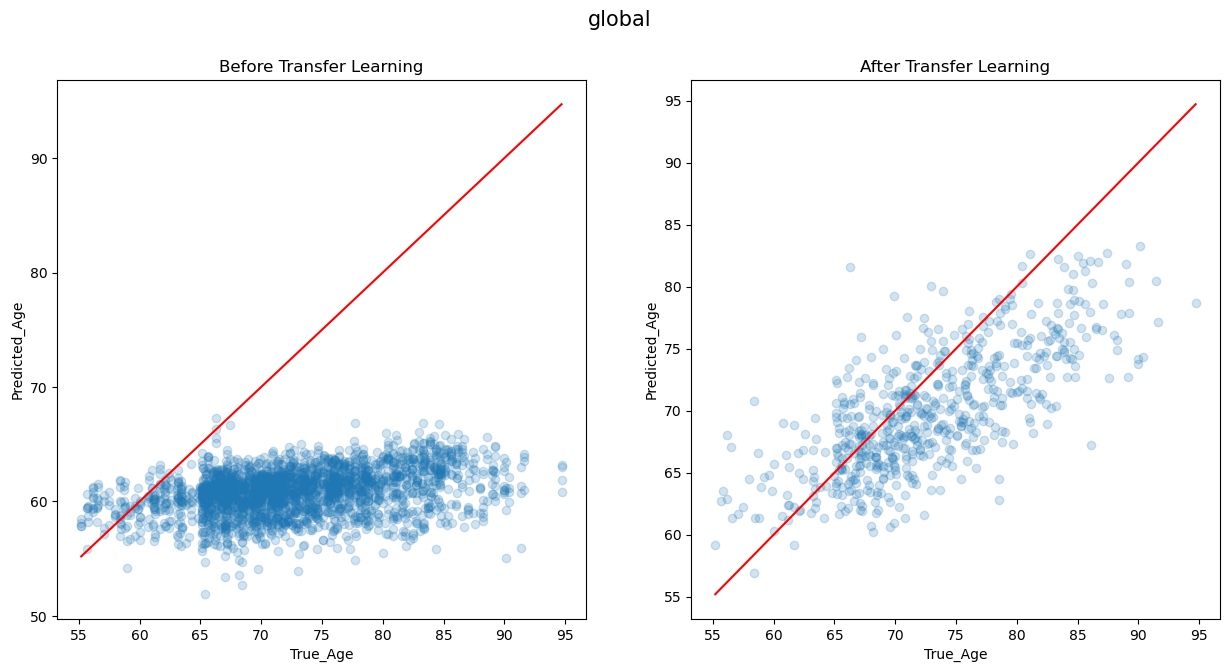

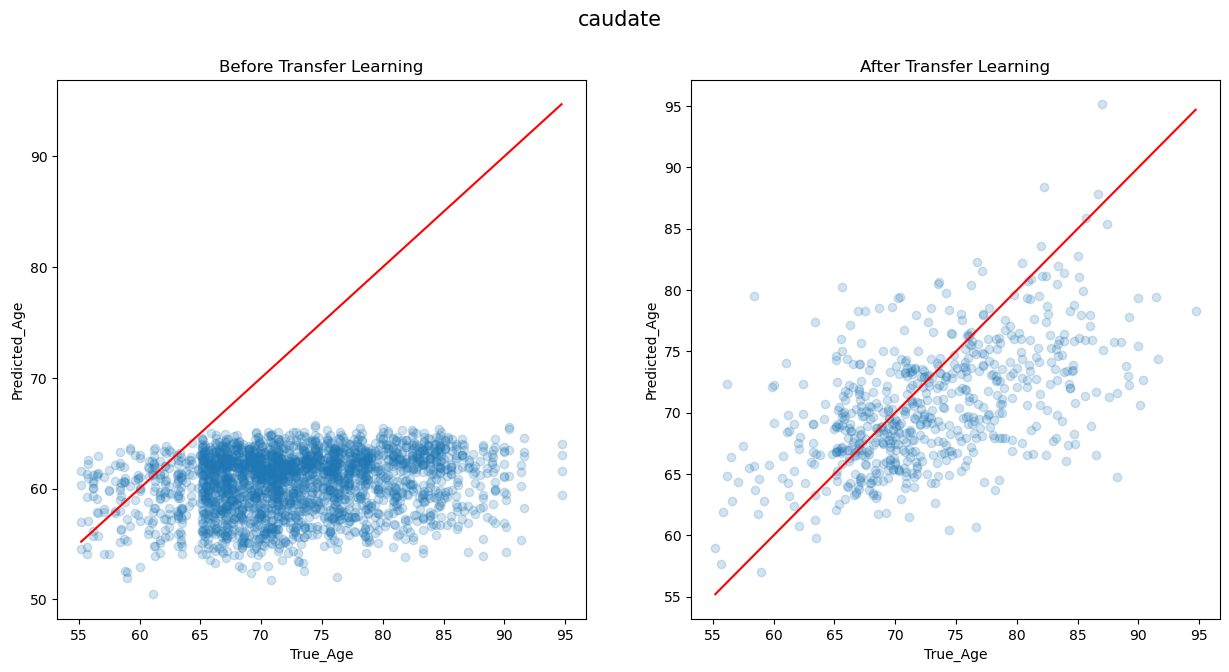

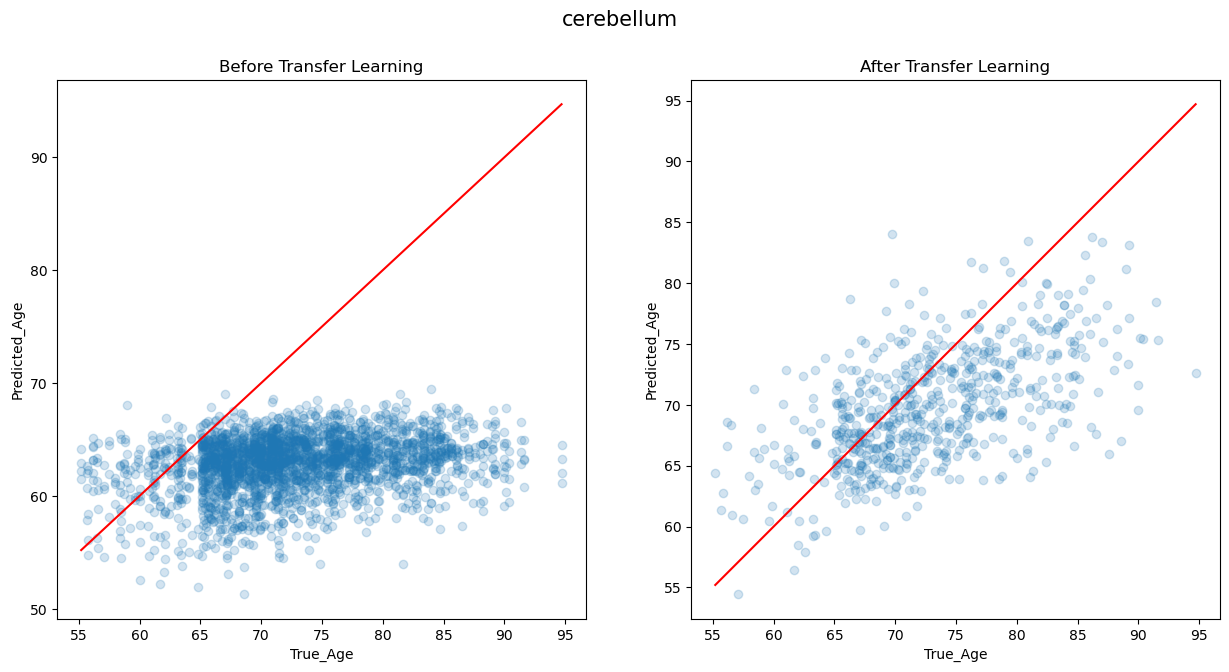

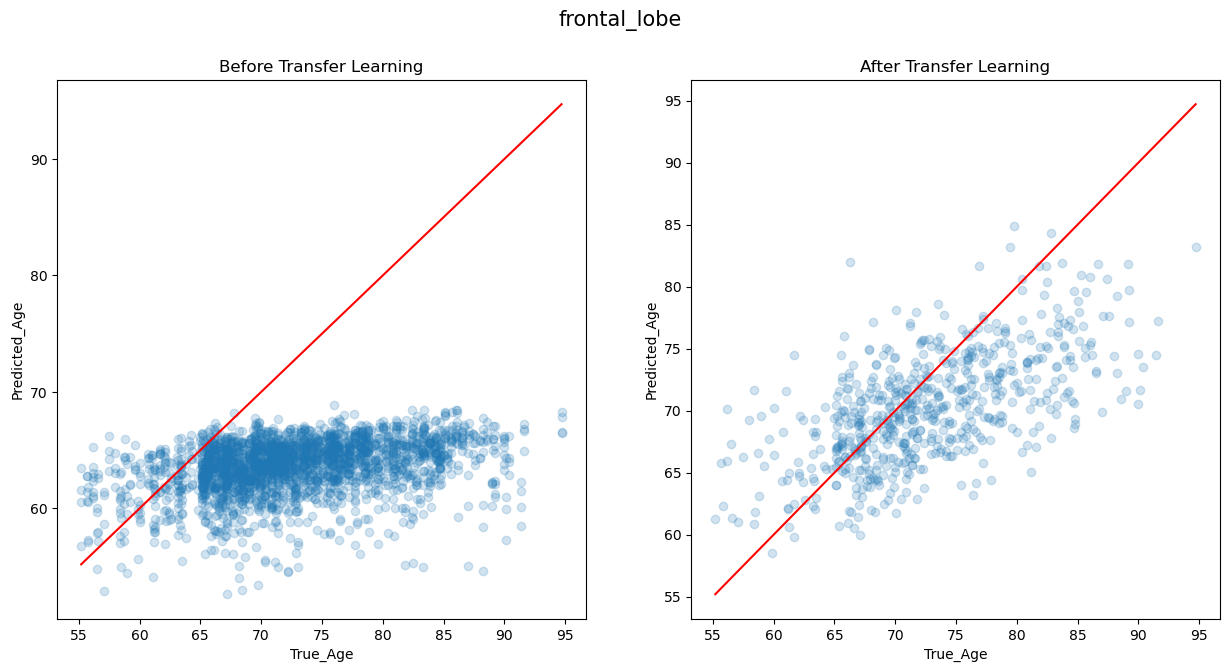

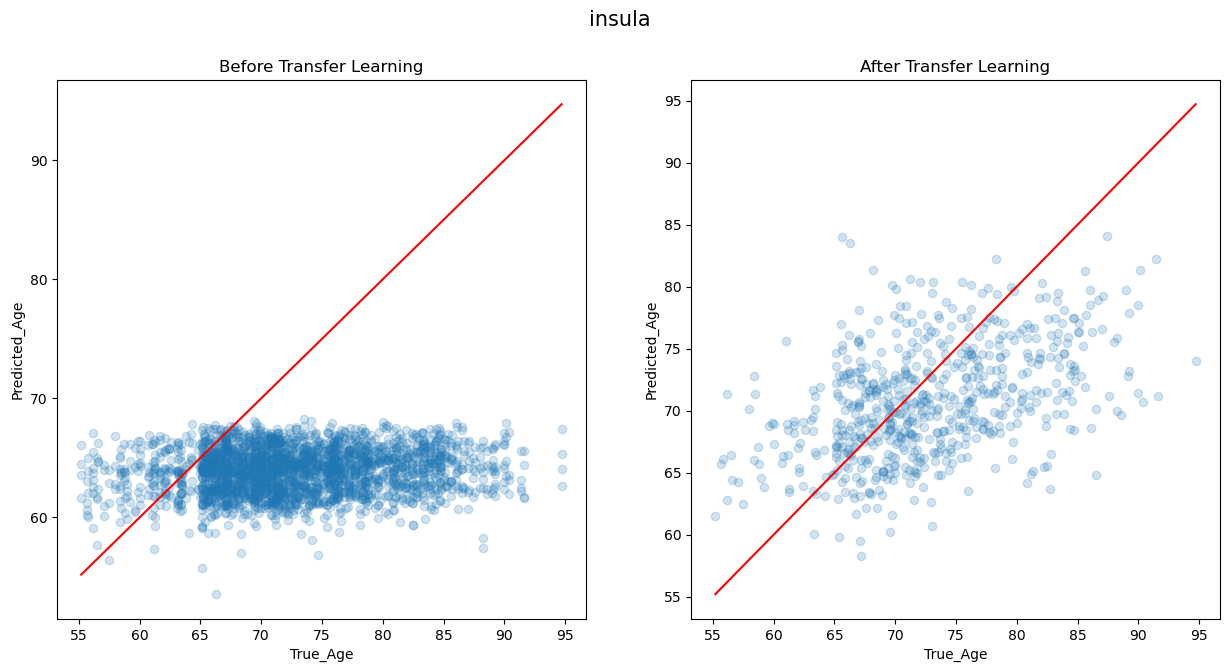

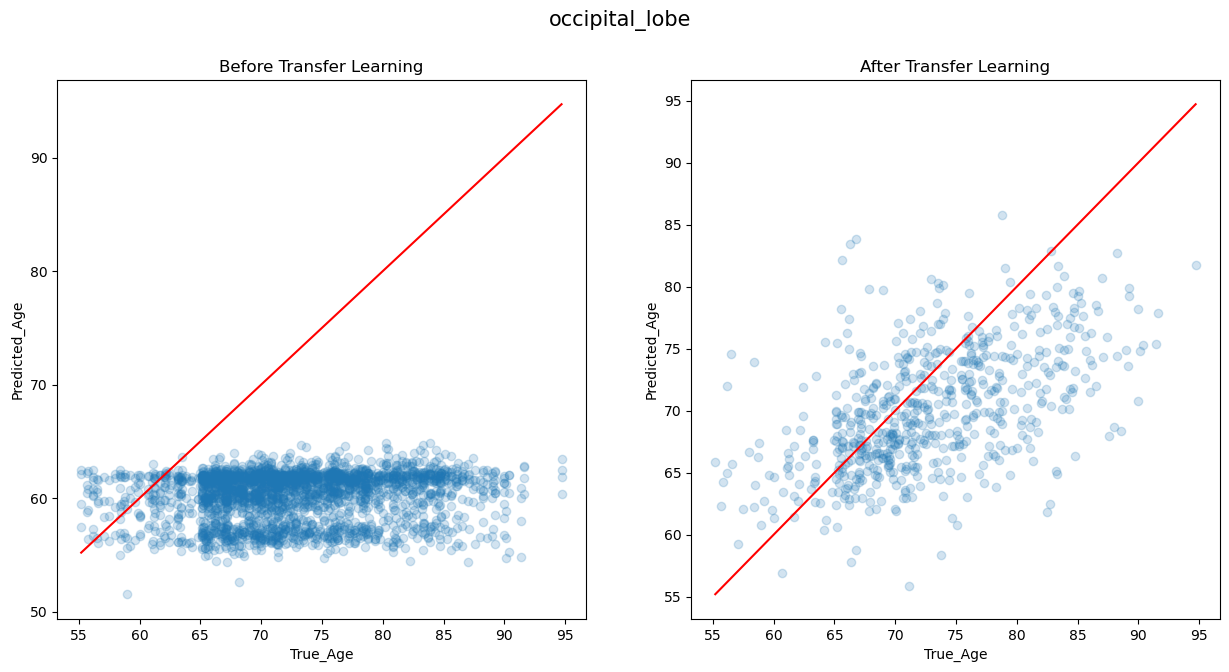

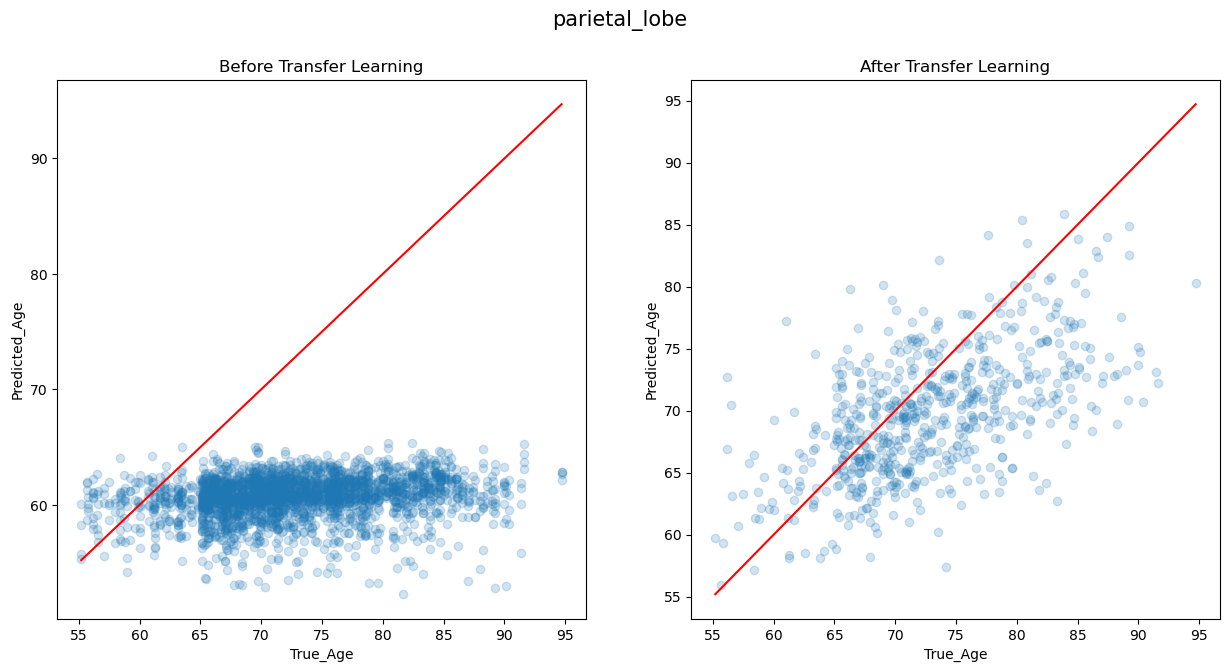

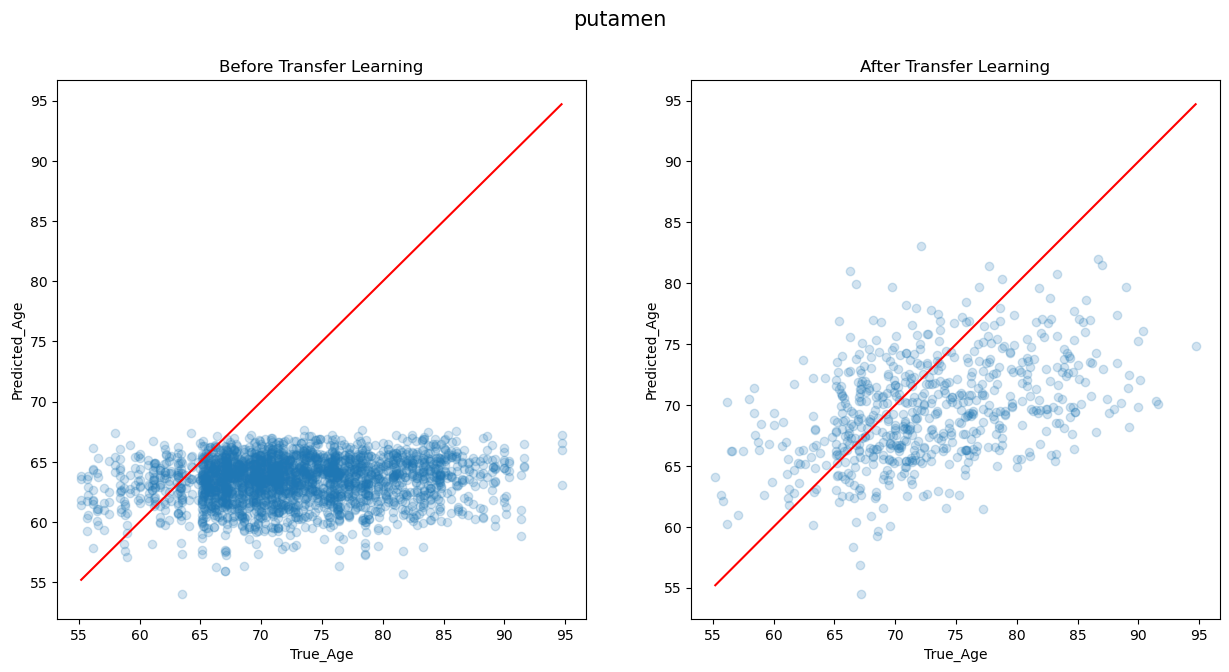

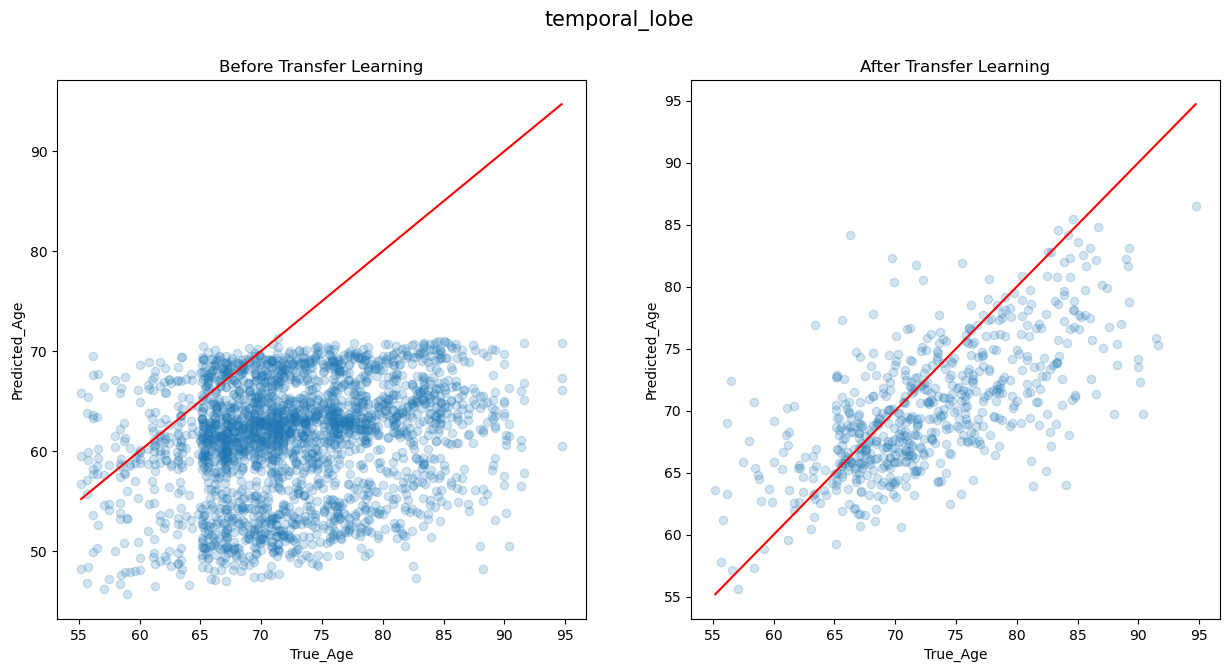

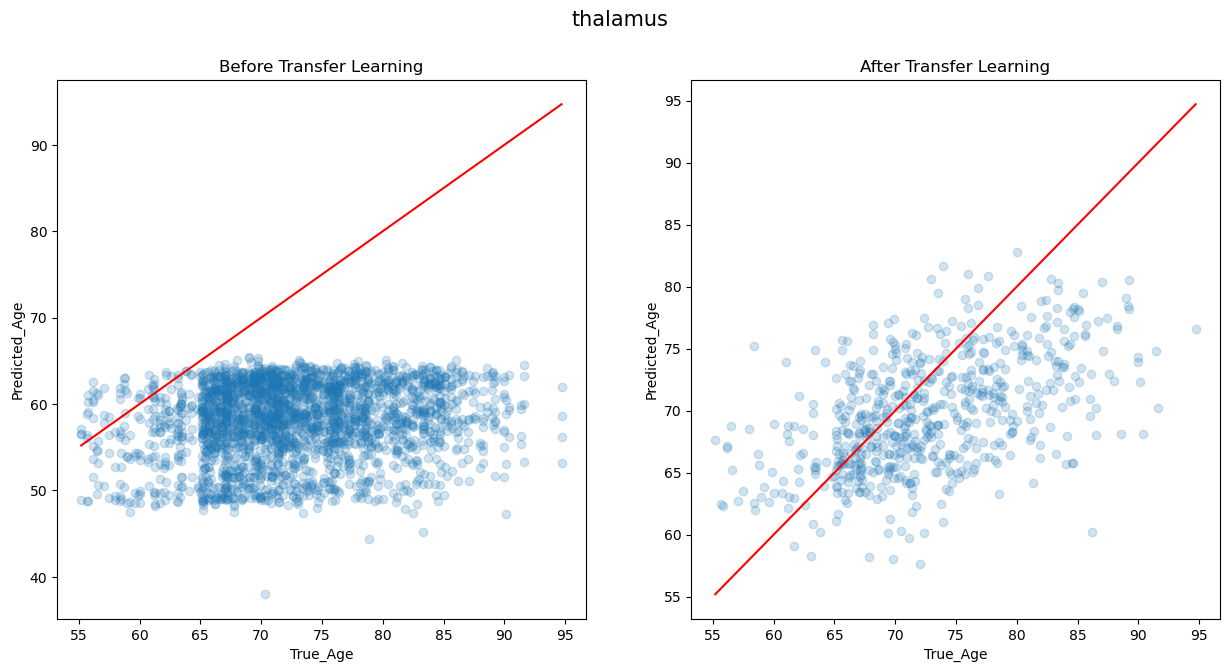

In [37]:
adni_test_root = root + 'adni'
adni_test_ages = pickel_load(adni_test_root)

adni_tf_root = root + 'adni_tf'
adni_tf_ages = pickel_load(adni_tf_root)

for k, v in regions.items():
    pred_ages_lists1 = adni_test_ages[v]['pred_ages']
    true_ages_lists1 = adni_test_ages[v]['true_ages']

    pred_ages_lists2 = adni_tf_ages[v]['pred_ages']
    true_ages_lists2 = adni_tf_ages[v]['true_ages']
    
    age_plot_comparison(pred_ages_lists1, true_ages_lists1, pred_ages_lists2, true_ages_lists2, v)

# UKB Plot

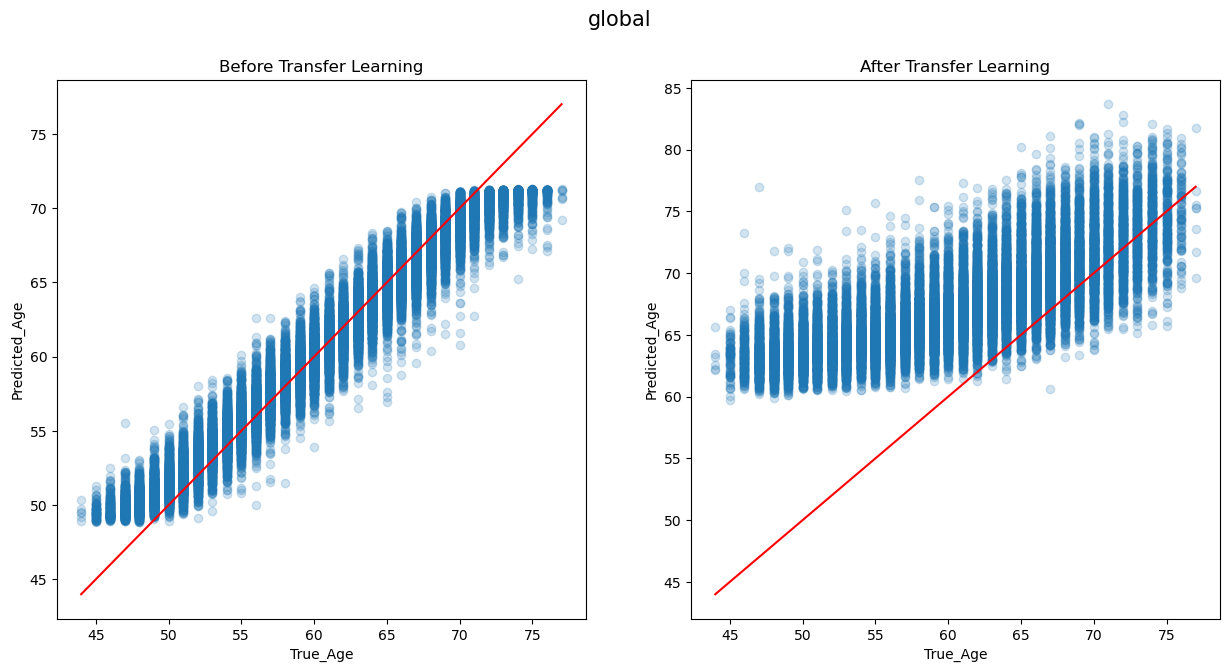

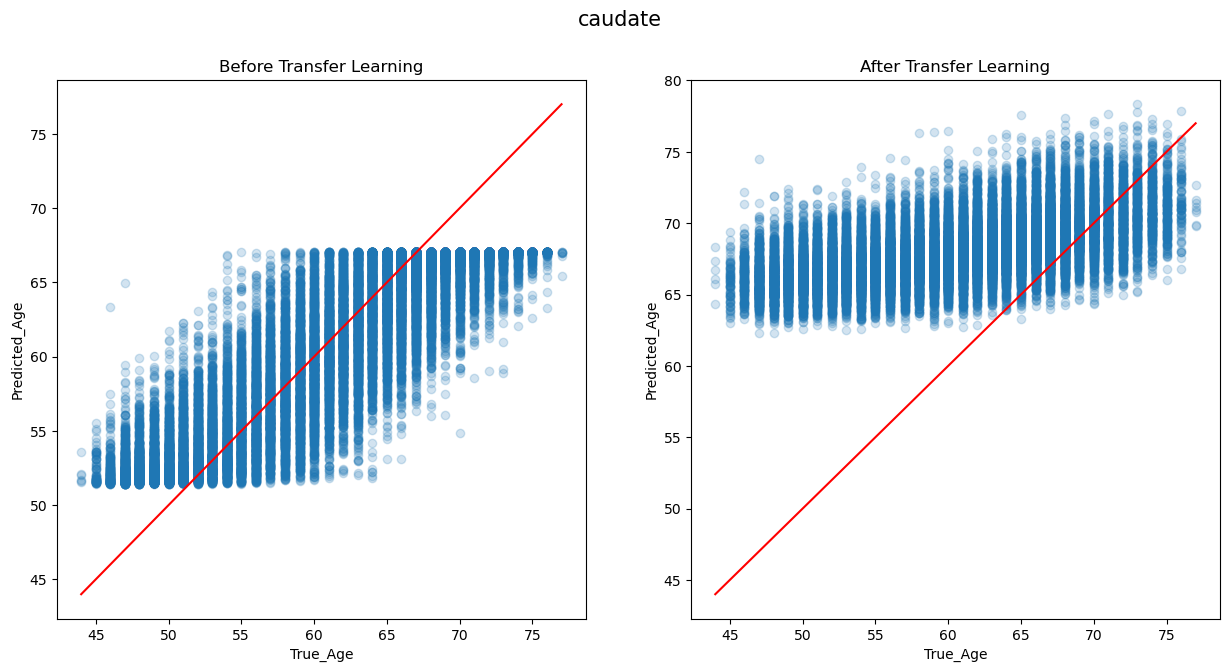

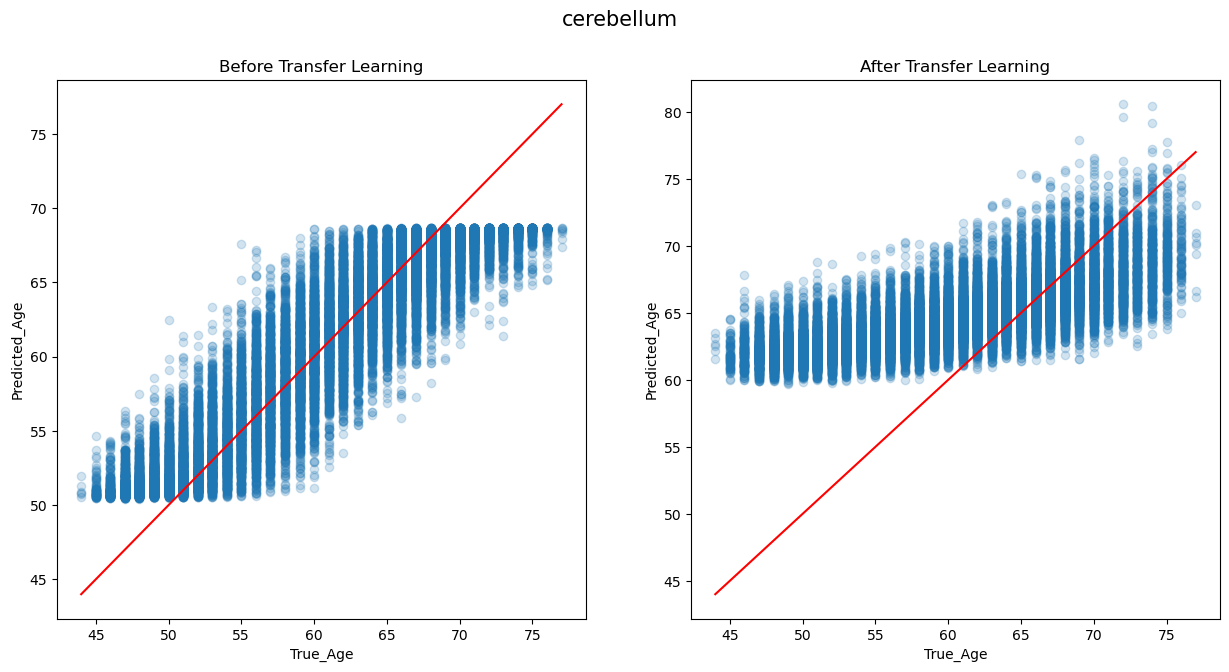

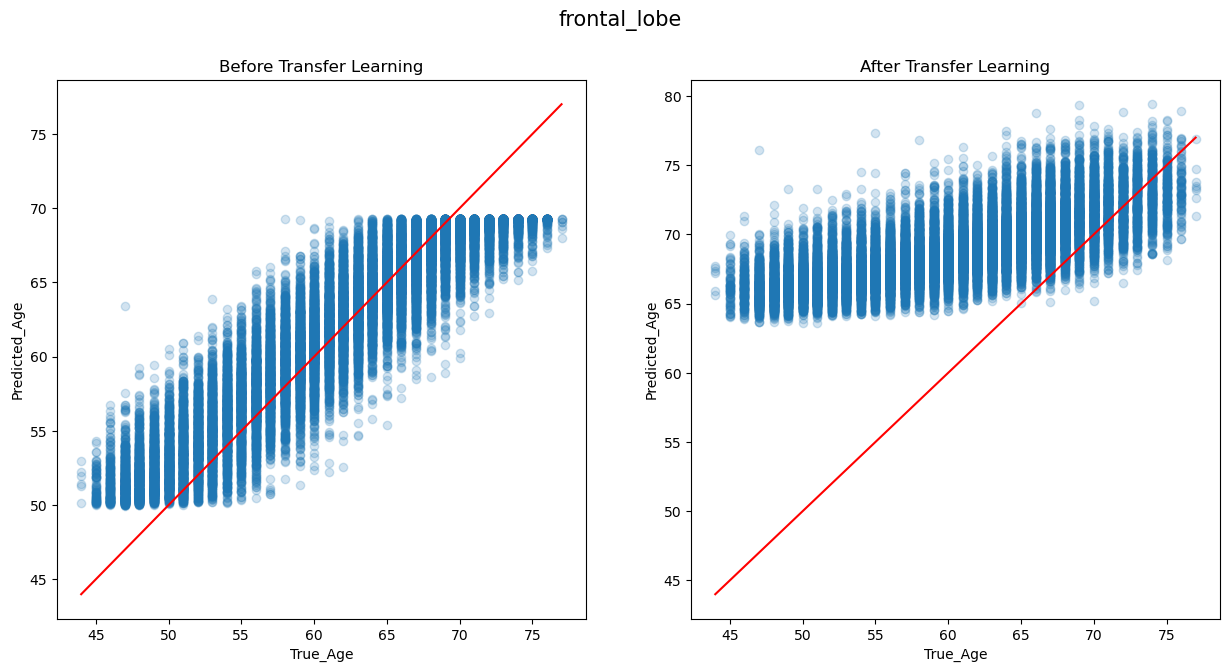

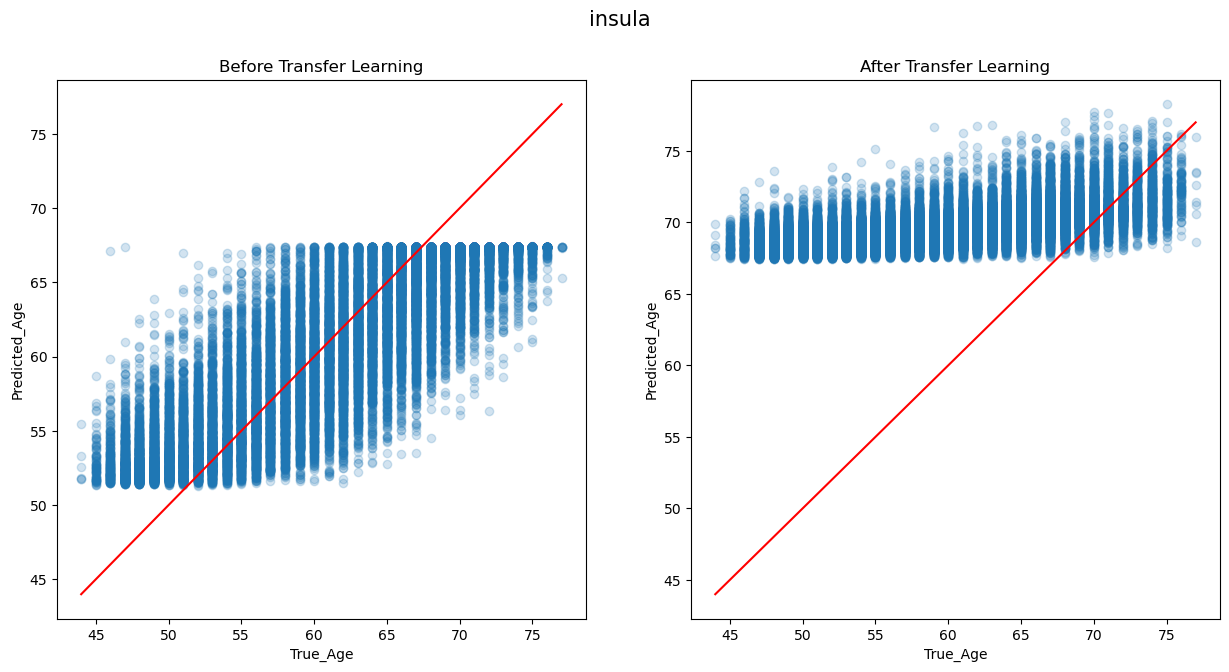

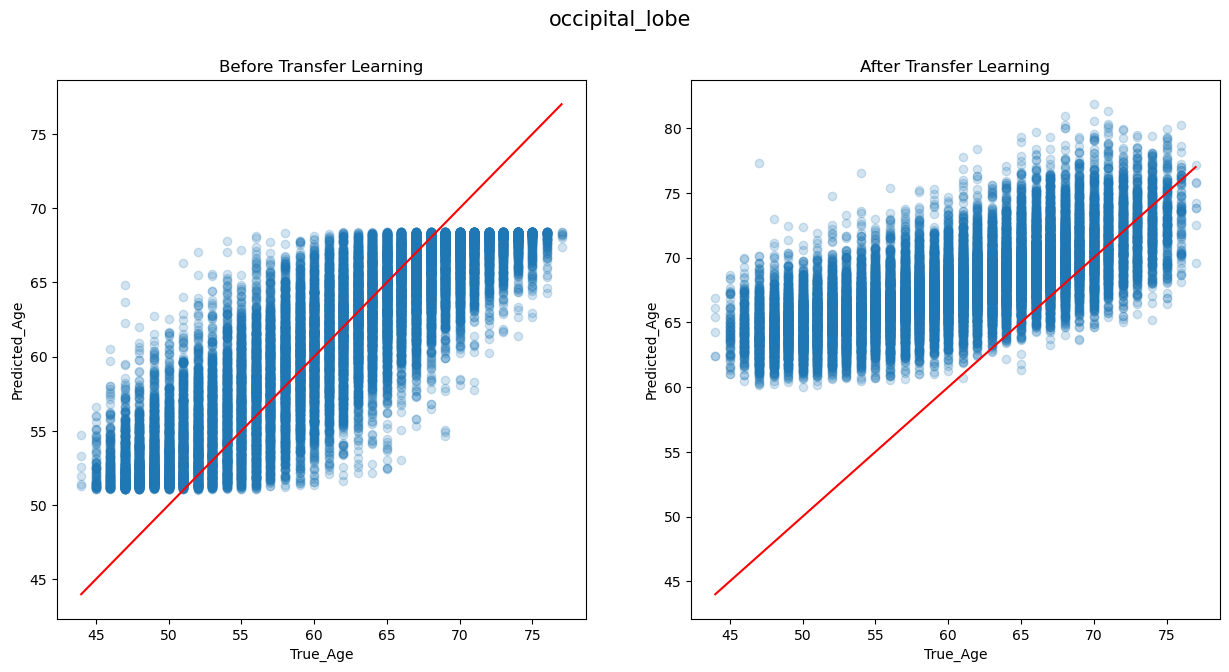

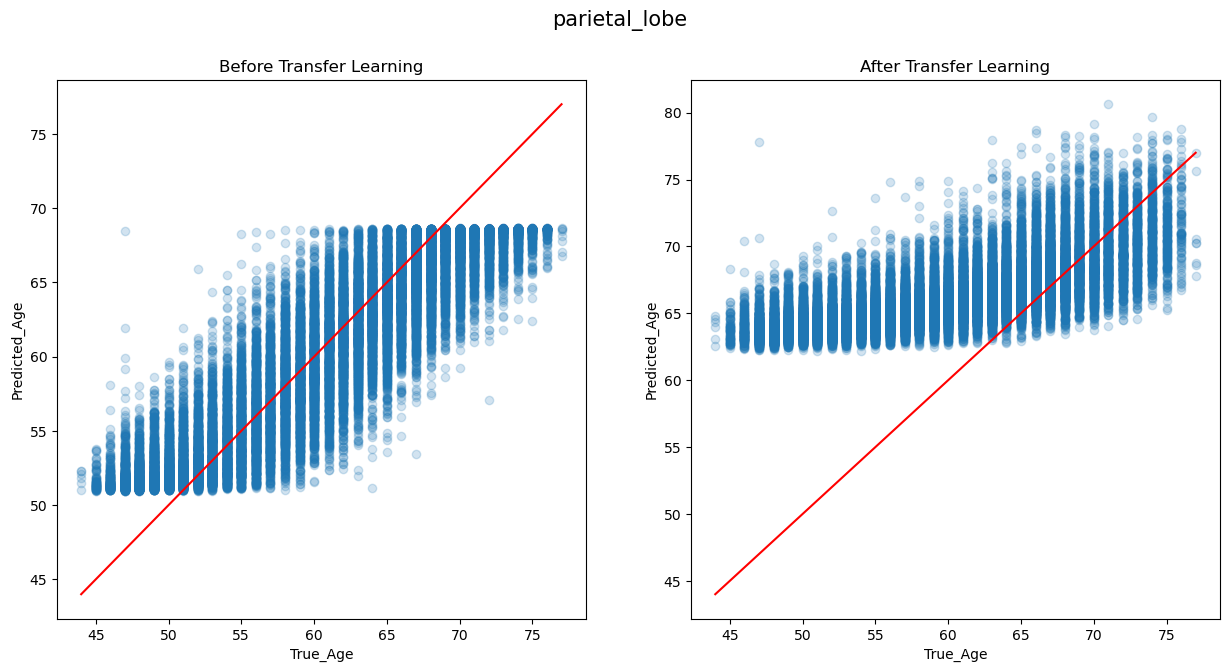

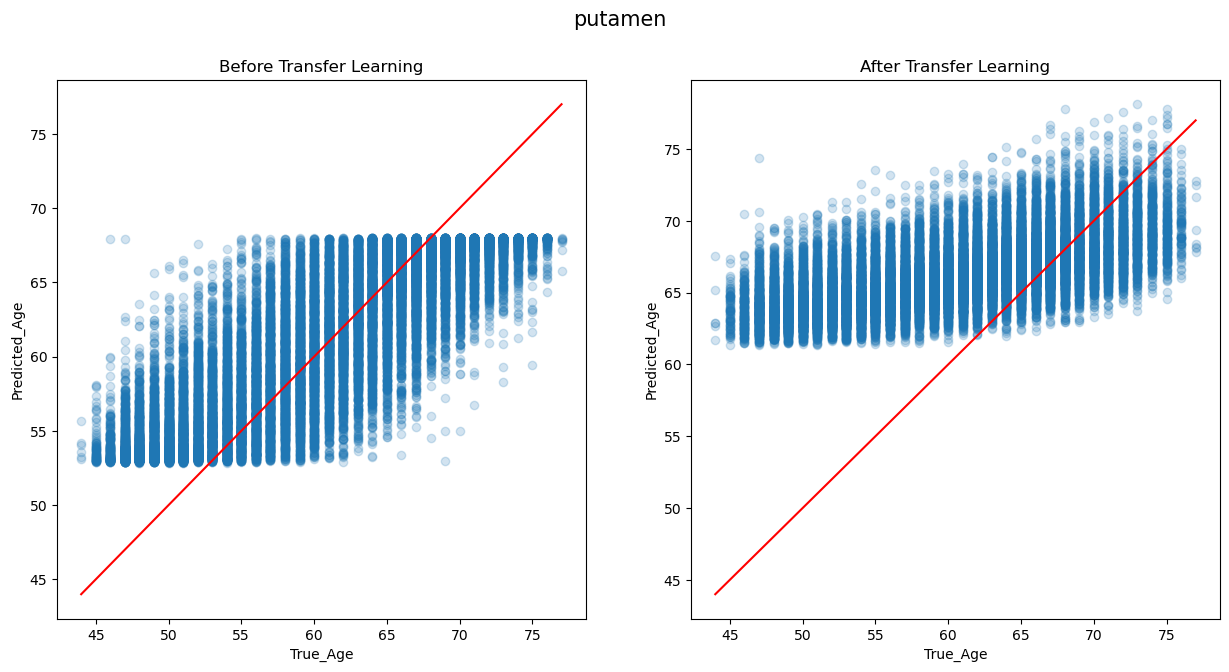

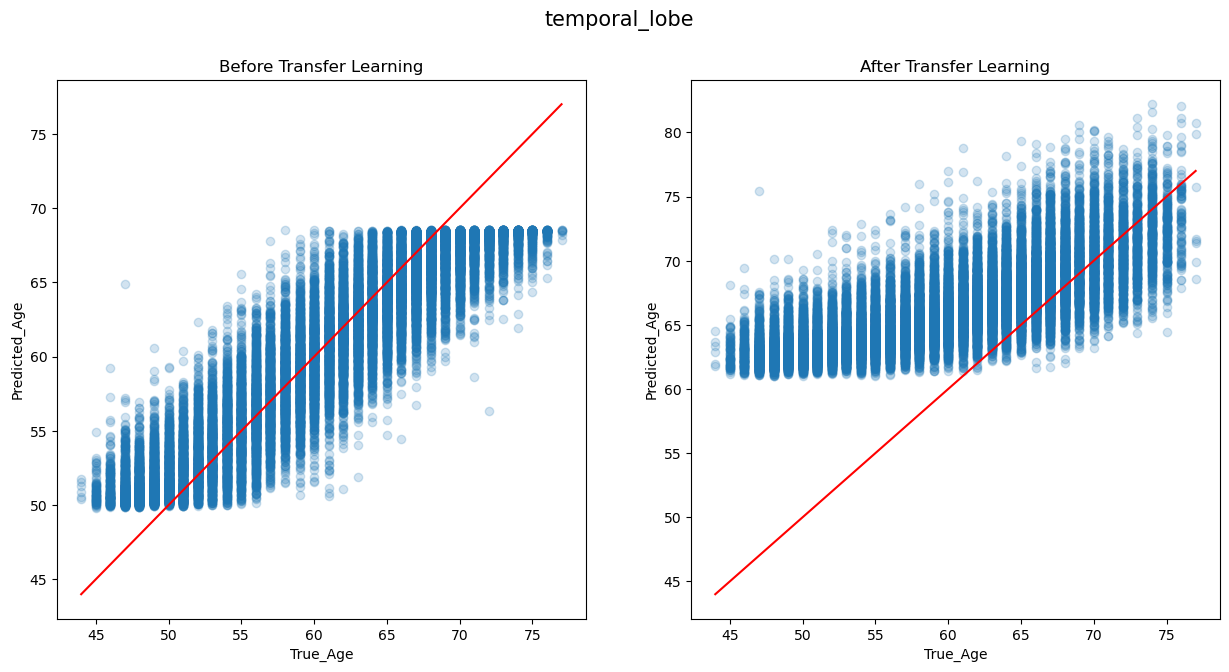

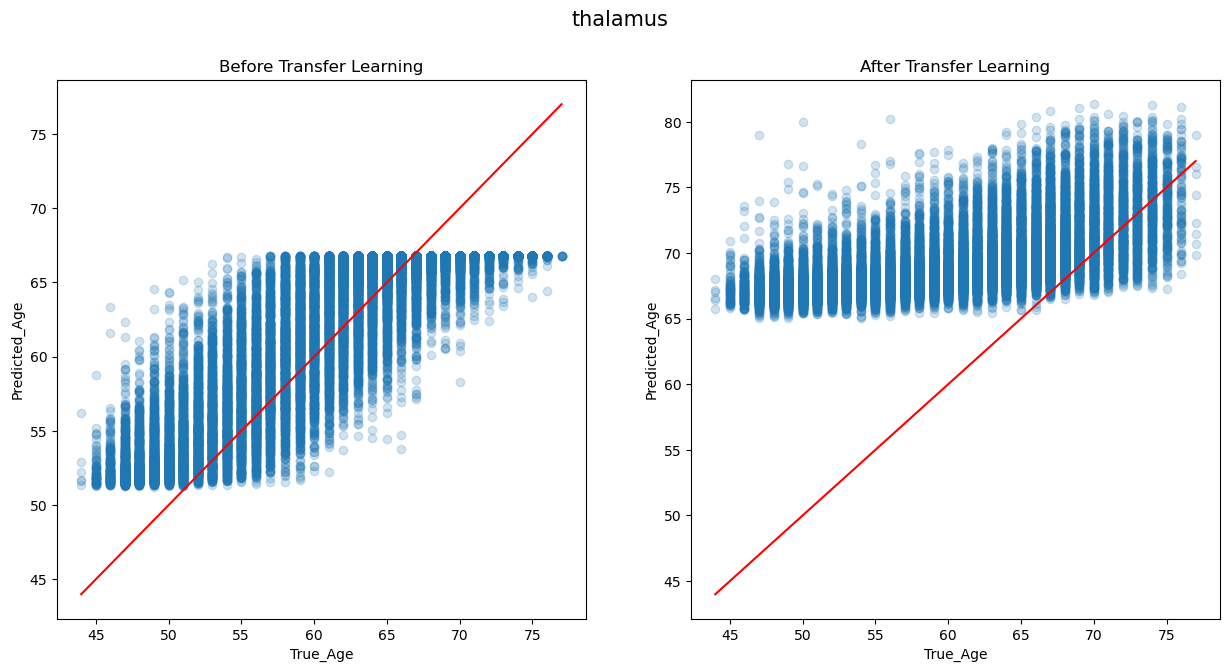

In [249]:
ukb_test_root = '../../test/ukb/'
ukb_test_ages = pickel_load(ukb_test_root)

ukb_tf_root = '../../test/ukb_tf/'
ukb_tf_ages = pickel_load(ukb_tf_root)

for k, v in regions.items():
    pred_ages_lists1 = ukb_test_ages[v]['pred_ages']
    true_ages_lists1 = ukb_test_ages[v]['true_ages']

    pred_ages_lists2 = ukb_tf_ages[v]['pred_ages']
    true_ages_lists2 = ukb_tf_ages[v]['true_ages']
    
    age_plot_comparison(pred_ages_lists1, true_ages_lists1, pred_ages_lists2, true_ages_lists2, v)

In [244]:
pred_ages_lists = ukb_test_ages['imgs']['pred_ages']
true_ages_lists = ukb_test_ages['imgs']['true_ages']
ukb_ages_lists_map = {
    'global_true': true_ages_lists,
    'global_pred': pred_ages_lists
}
pred_ages_lists_df = pd.DataFrame(ukb_ages_lists_map)
pred_ages_lists_df.describe()

global_true   global_pred
count  25656.000000  25656.000000
mean      60.416004     60.513670
std        7.382730      6.359773
min       44.000000     48.840307
25%       54.750000     55.089218
50%       61.000000     60.887585
75%       66.000000     65.871346
max       77.000000     71.270376

In [245]:
true_var = pred_ages_lists_df['global_true'].var()
pred_var = pred_ages_lists_df['global_pred'].var()
print(true_var, pred_var)

54.504695892333984 40.446714087410626


# 3개 그래프 비교

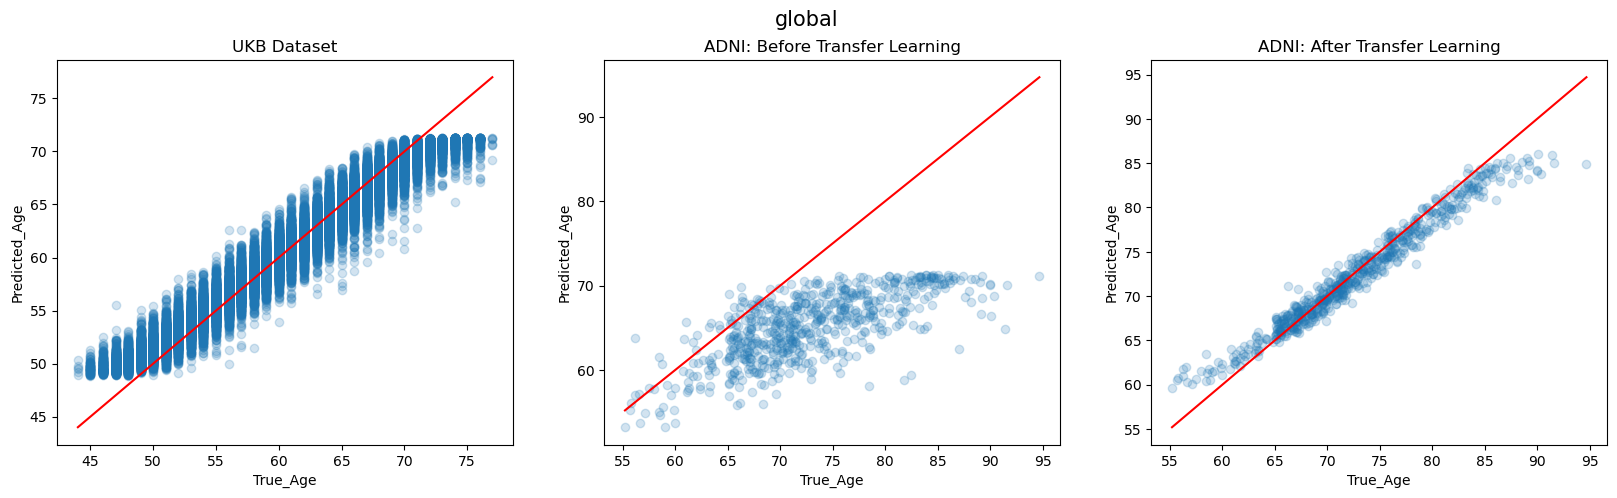

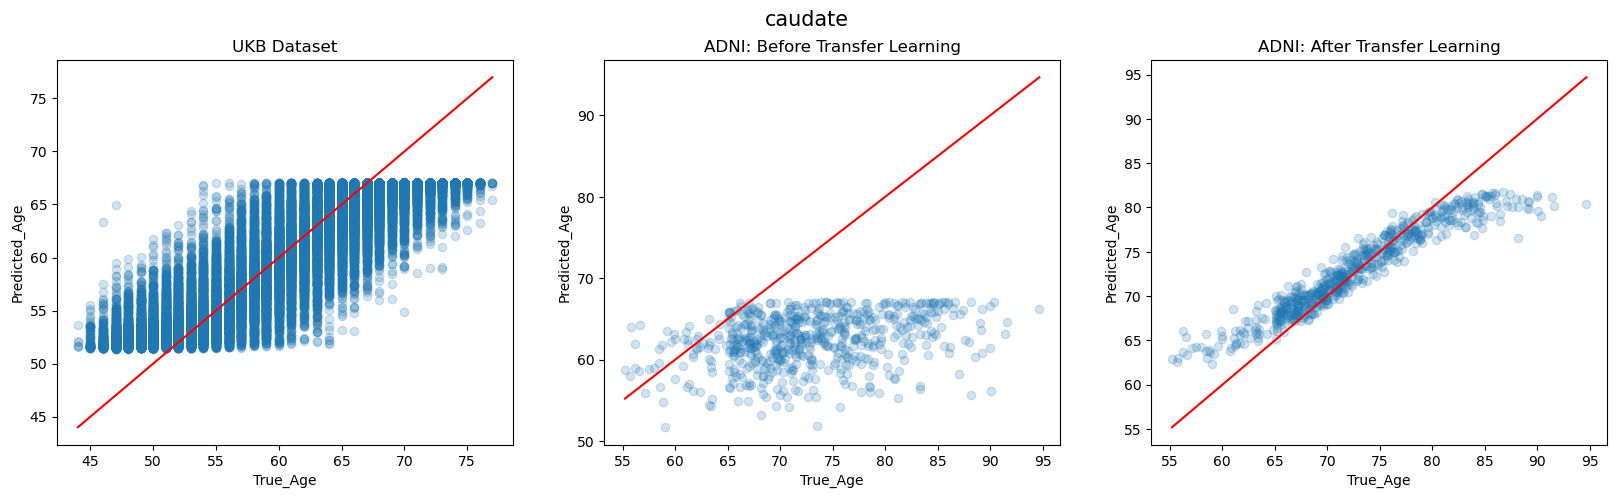

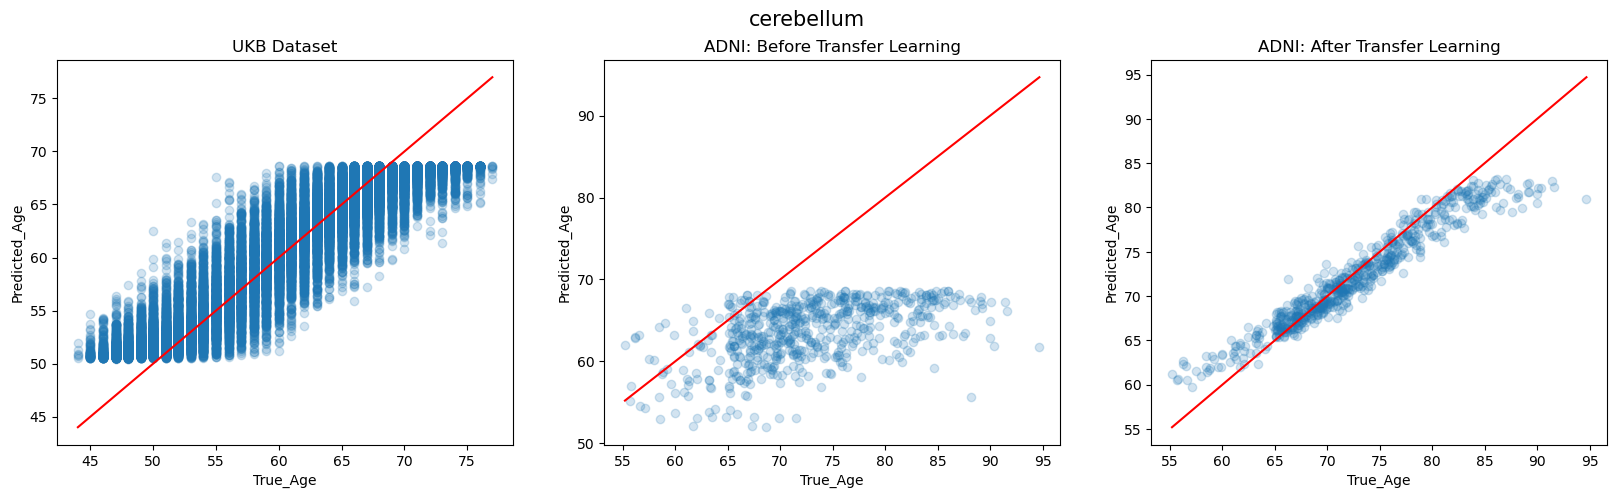

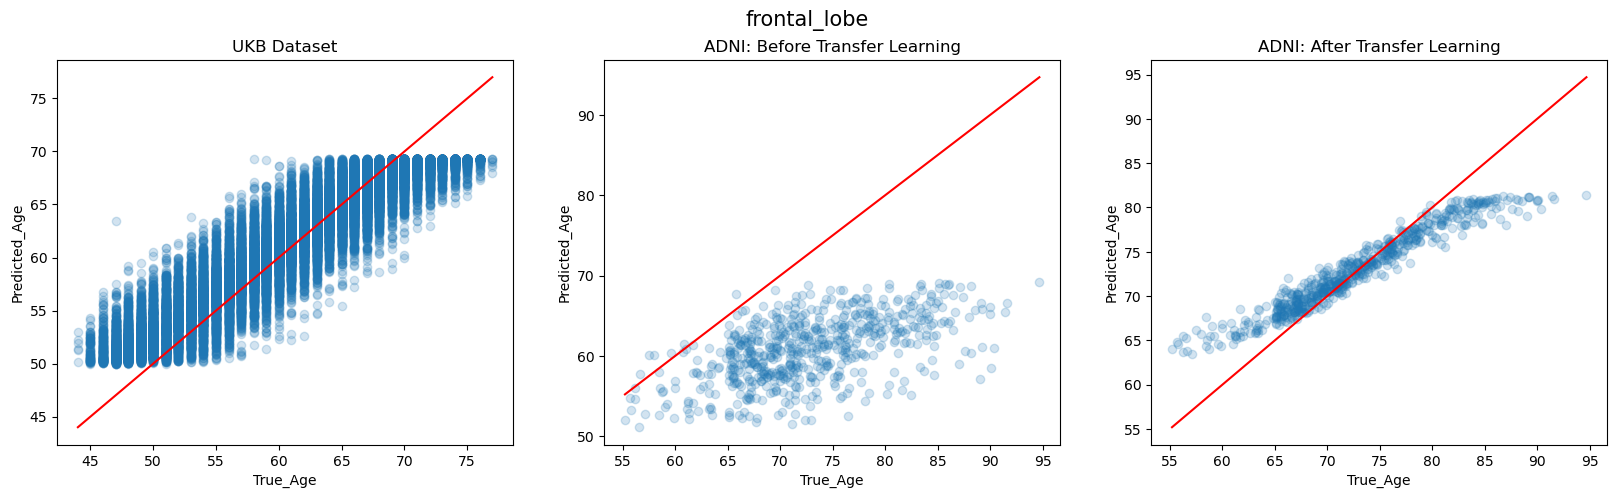

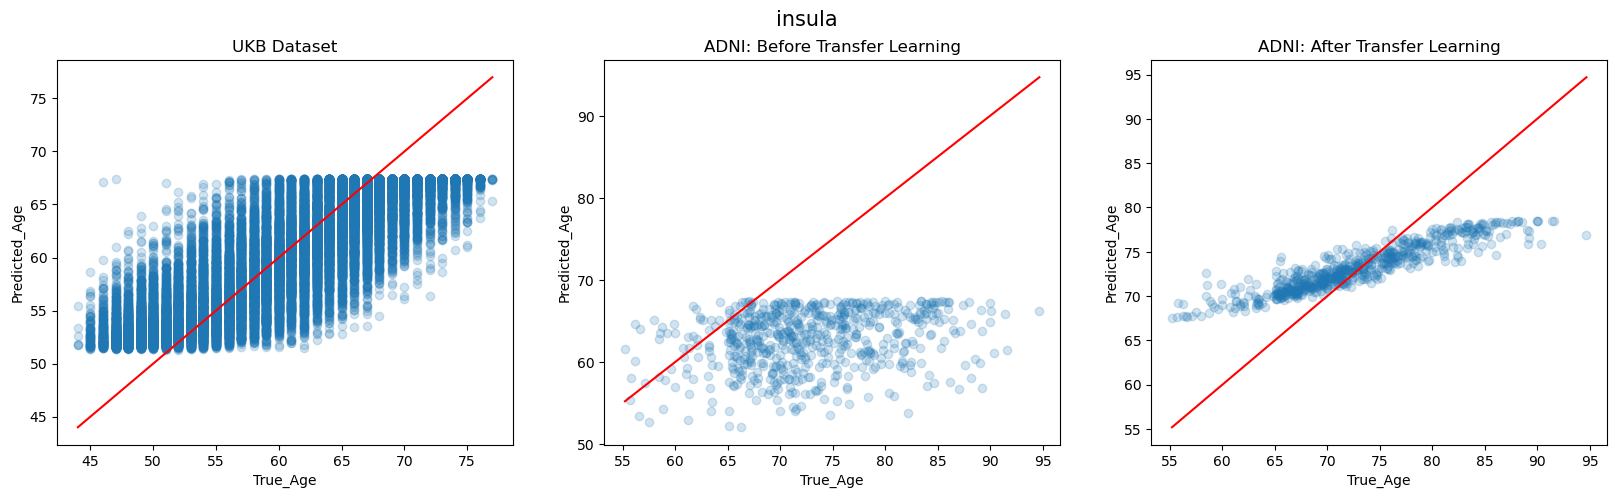

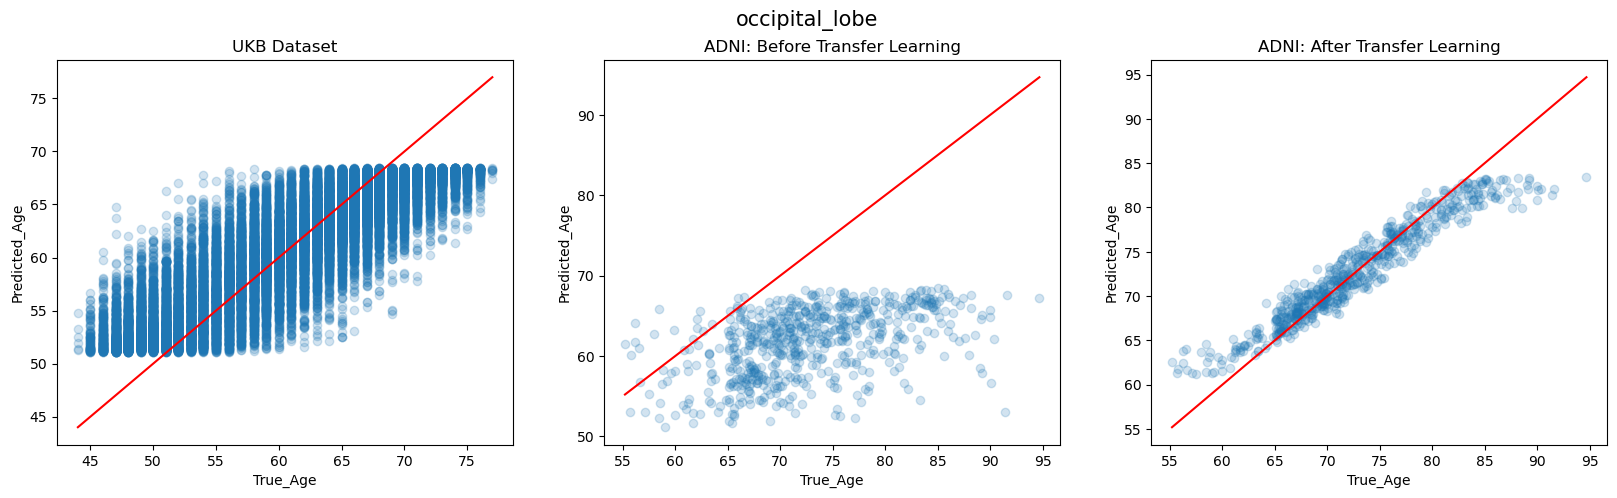

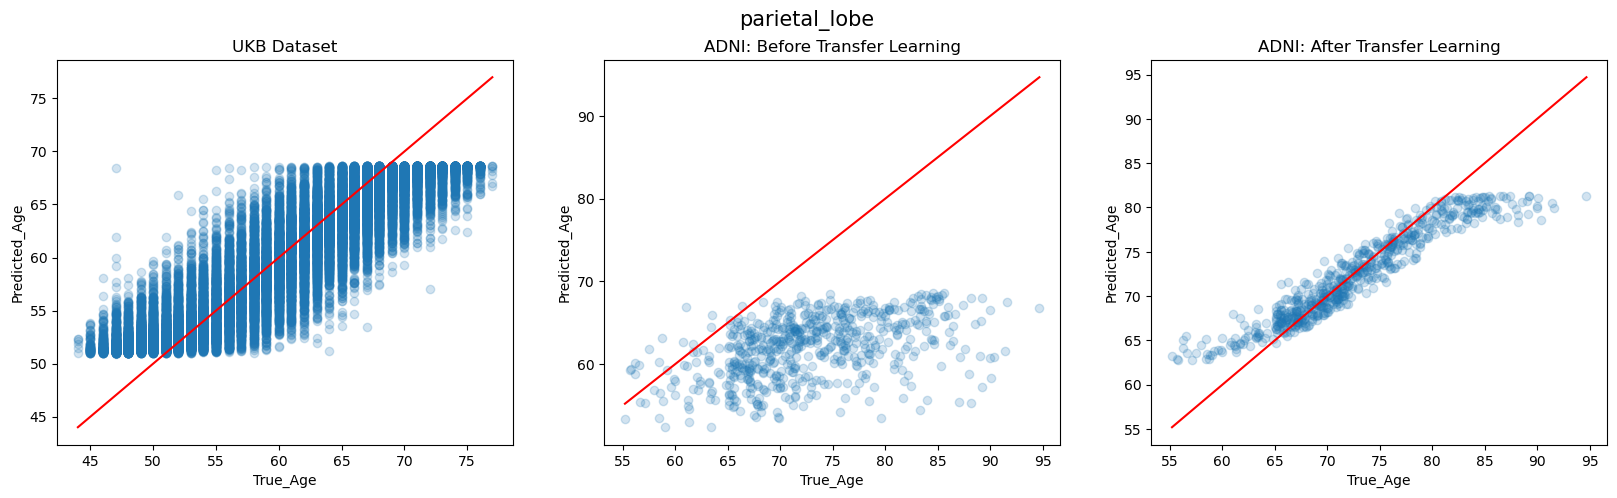

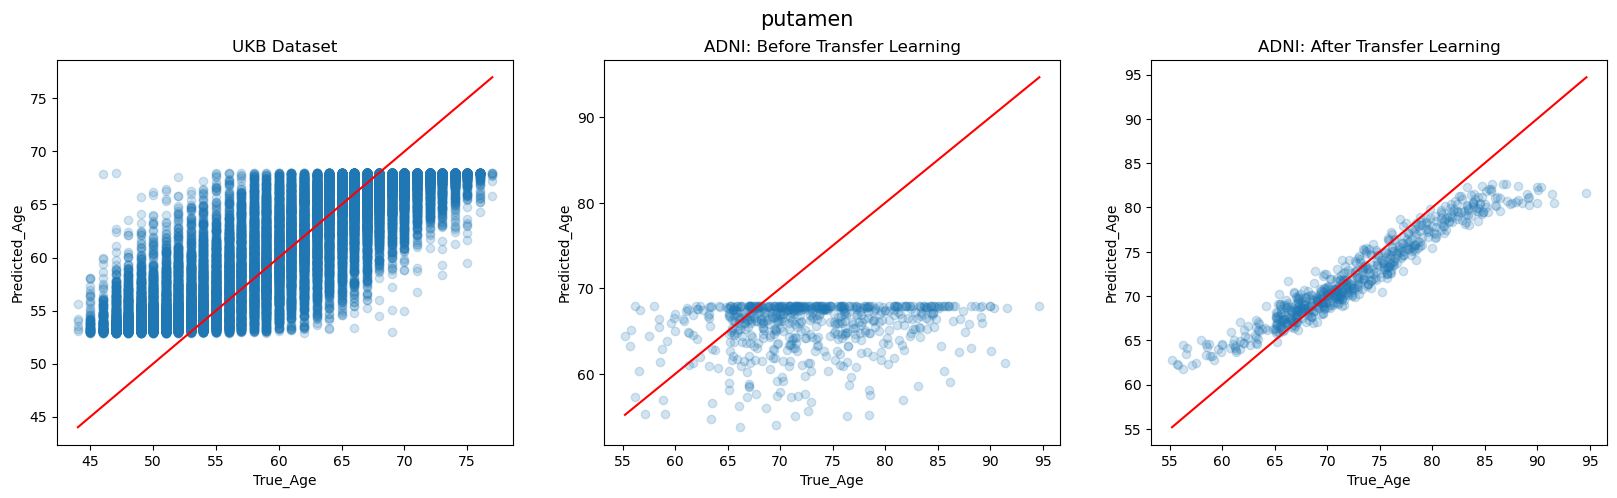

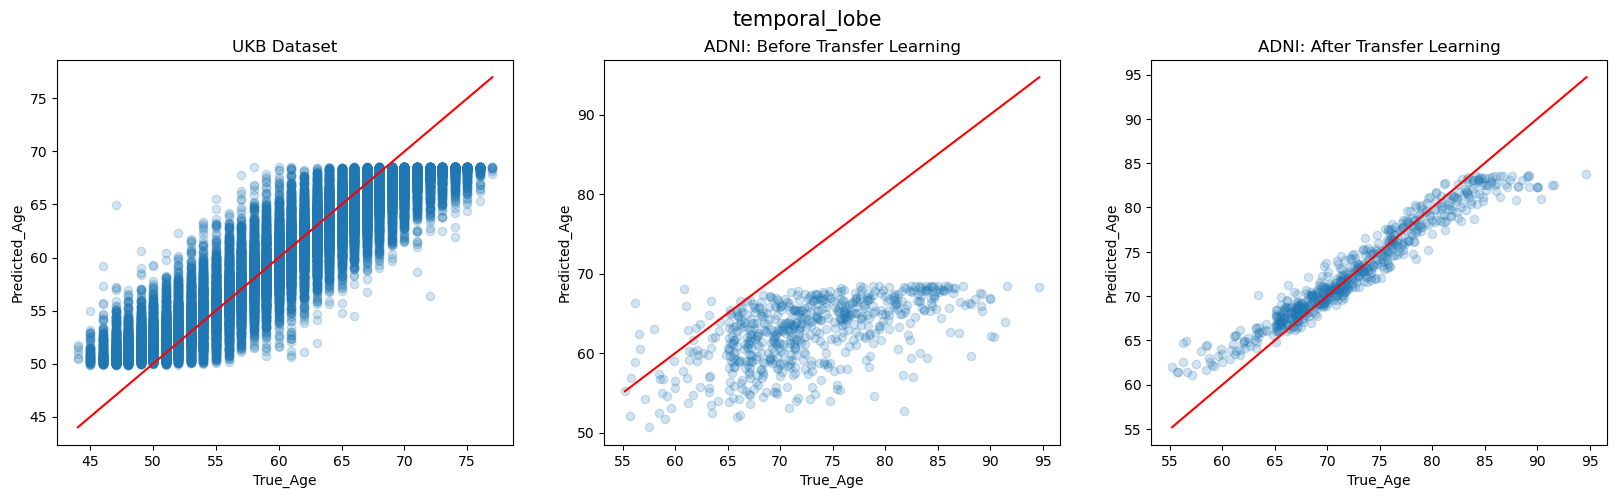

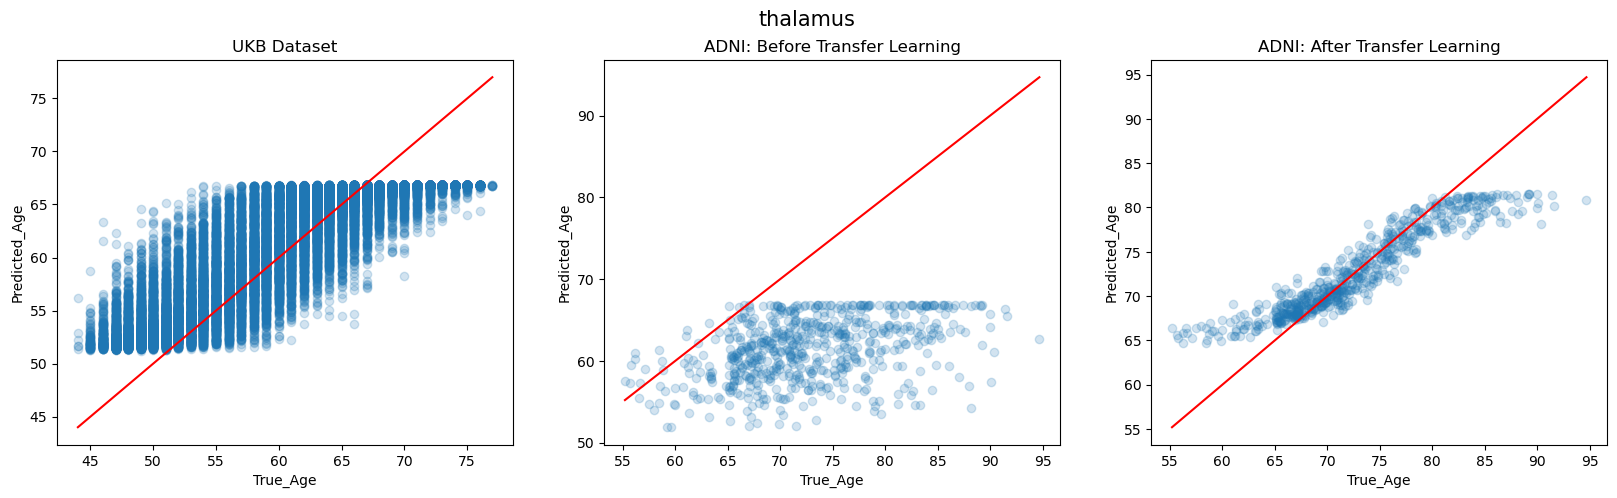

In [251]:
for k, v in regions.items():

    pred_ages_lists1 = adni_test_ages[v]['pred_ages']
    true_ages_lists1 = adni_test_ages[v]['true_ages']

    pred_ages_lists2 = adni_tf_ages[v]['pred_ages']
    true_ages_lists2 = adni_tf_ages[v]['true_ages']
    
    pred_ages_lists = ukb_test_ages[v]['pred_ages']
    true_ages_lists = ukb_test_ages[v]['true_ages']

    age_plot_comparison_3(pred_ages_lists1, true_ages_lists1, pred_ages_lists2, true_ages_lists2, pred_ages_lists, true_ages_lists, v)


# Age distribution

### 1. Global

In [203]:
def age_hist(data):

    plt.hist(data['global_true'], bins=30, alpha=0.5, label='True Age', density=True, edgecolor='black')
    plt.hist(data['global_pred'], bins=30, alpha=0.5, label='Predicted Age', density=True, edgecolor='black')
    plt.hist(data['global_pred_tf'], bins=30, alpha=0.5, label='Predicted Age_tf', density=True, edgecolor='black')

    plt.title('Age Distribution of Healty Individuals')
    plt.xlabel('Age')
    plt.ylabel('Density')

    plt.legend(loc='upper right')
    plt.show()

    true_var = data['global_true'].var()
    pred_var = data['global_pred'].var()
    pred_tf_var = data['global_pred_tf'].var()

    print(f"{true_var:.3f}, {pred_var:.3f}, {pred_tf_var:.3f}")

In [206]:
adni_ages_lists_map = {
    'global_true': adni_test_ages[regions[0]]['true_ages'],
    'global_pred': adni_test_ages[regions[0]]['pred_ages'],
    'global_pred_tf': adni_tf_ages[regions[0]]['pred_ages']
}
adni_ages_lists_df = pd.DataFrame(adni_ages_lists_map)
adni_ages_lists_df.describe()

global_true  global_pred  global_pred_tf
count   630.000000   630.000000      630.000000
mean     72.764282    65.128227       72.474110
std       7.127740     3.925856        6.005839
min      55.200001    53.205401       59.666070
25%      67.599998    62.377344       67.965885
50%      71.750000    65.525927       71.558749
75%      77.450001    68.144409       76.746231
max      94.699997    71.242079       86.053663

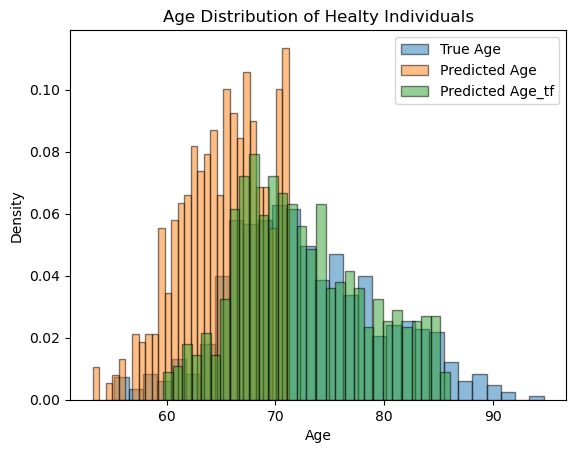

50.805, 15.412, 36.070


In [207]:
age_hist(adni_ages_lists_df)

### 2. caudate

In [209]:
num = 1
print(regions[num])

adni_ages_lists_map = {
    'global_true': adni_test_ages[regions[num]]['true_ages'],
    'global_pred': adni_test_ages[regions[num]]['pred_ages'],
    'global_pred_tf': adni_tf_ages[regions[num]]['pred_ages']
}
adni_ages_lists_df = pd.DataFrame(adni_ages_lists_map)
adni_ages_lists_df.describe()

caudate


global_true  global_pred  global_pred_tf
count   630.000000   630.000000      630.000000
mean     72.764282    62.398559       72.936395
std       7.127740     3.172971        4.702312
min      55.200001    51.684270       62.348632
25%      67.599998    60.462998       69.258687
50%      71.750000    62.649114       72.462115
75%      77.450001    64.946300       76.893410
max      94.699997    67.042879       81.740345

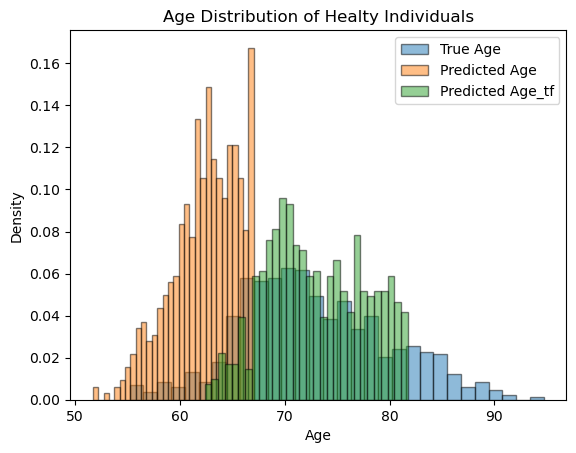

50.805, 10.068, 22.112


In [210]:
age_hist(adni_ages_lists_df)

# 3. cerebellum

In [211]:
num = 2
print(regions[num])

adni_ages_lists_map = {
    'global_true': adni_test_ages[regions[num]]['true_ages'],
    'global_pred': adni_test_ages[regions[num]]['pred_ages'],
    'global_pred_tf': adni_tf_ages[regions[num]]['pred_ages']
}
adni_ages_lists_df = pd.DataFrame(adni_ages_lists_map)
adni_ages_lists_df.describe()

cerebellum


global_true  global_pred  global_pred_tf
count   630.000000   630.000000      630.000000
mean     72.764282    63.623368       72.177895
std       7.127740     3.615078        5.480347
min      55.200001    51.946328       59.725730
25%      67.599998    61.391173       68.077254
50%      71.750000    64.190533       71.229316
75%      77.450001    66.632866       76.312874
max      94.699997    68.608652       83.192287

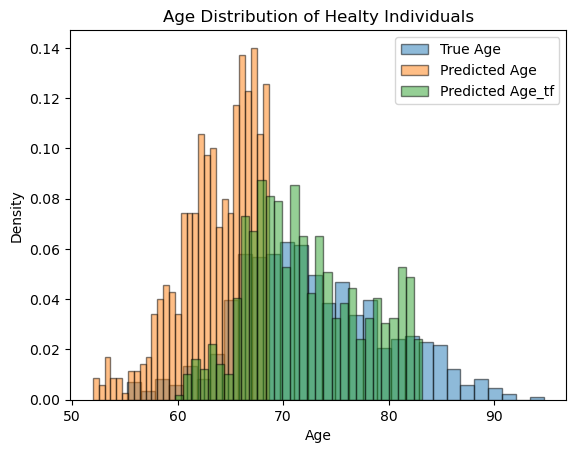

50.805, 13.069, 30.034


In [212]:
age_hist(adni_ages_lists_df)

# 4. frontal lobe

In [213]:
num = 3
print(regions[num])

adni_ages_lists_map = {
    'global_true': adni_test_ages[regions[num]]['true_ages'],
    'global_pred': adni_test_ages[regions[num]]['pred_ages'],
    'global_pred_tf': adni_tf_ages[regions[num]]['pred_ages']
}
adni_ages_lists_df = pd.DataFrame(adni_ages_lists_map)
adni_ages_lists_df.describe()

frontal_lobe


global_true  global_pred  global_pred_tf
count   630.000000   630.000000      630.000000
mean     72.764282    60.863492       72.912873
std       7.127740     4.007662        4.394527
min      55.200001    51.108135       63.485958
25%      67.599998    57.958760       69.426219
50%      71.750000    61.052741       72.406672
75%      77.450001    63.783244       76.346937
max      94.699997    69.250149       81.382498

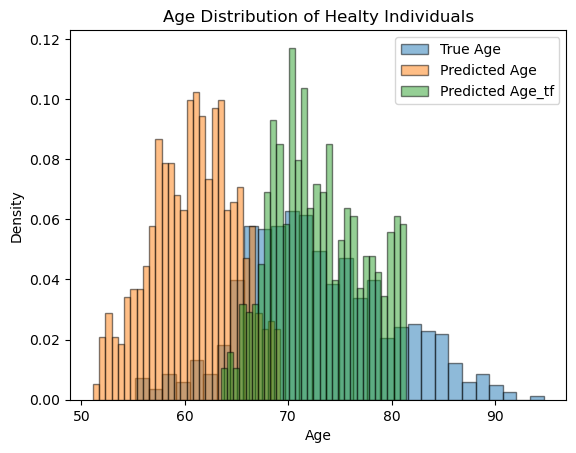

50.805, 16.061, 19.312


In [214]:
age_hist(adni_ages_lists_df)

## 5. insula

In [215]:
num = 4
print(regions[num])

adni_ages_lists_map = {
    'global_true': adni_test_ages[regions[num]]['true_ages'],
    'global_pred': adni_test_ages[regions[num]]['pred_ages'],
    'global_pred_tf': adni_tf_ages[regions[num]]['pred_ages']
}
adni_ages_lists_df = pd.DataFrame(adni_ages_lists_map)
adni_ages_lists_df.describe()

insula


global_true  global_pred  global_pred_tf
count   630.000000   630.000000      630.000000
mean     72.764282    62.710765       73.173902
std       7.127740     3.494299        2.582929
min      55.200001    52.038224       67.519146
25%      67.599998    60.346295       71.194890
50%      71.750000    63.357103       72.808367
75%      77.450001    65.647471       74.975540
max      94.699997    67.408226       78.501770

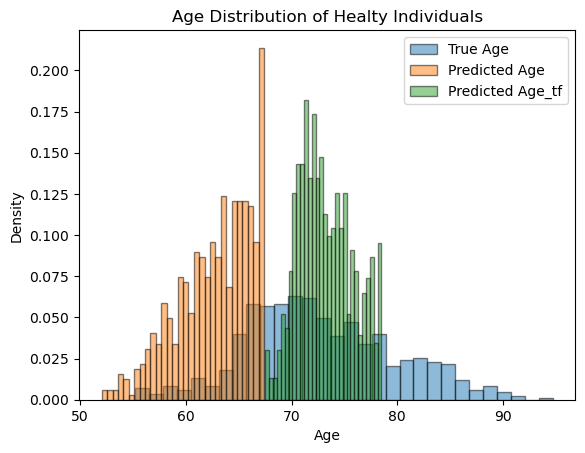

50.805, 12.210, 6.672


In [216]:
age_hist(adni_ages_lists_df)

## 6. Occipital Lobe

In [217]:
num = 5
print(regions[num])

adni_ages_lists_map = {
    'global_true': adni_test_ages[regions[num]]['true_ages'],
    'global_pred': adni_test_ages[regions[num]]['pred_ages'],
    'global_pred_tf': adni_tf_ages[regions[num]]['pred_ages']
}
adni_ages_lists_df = pd.DataFrame(adni_ages_lists_map)
adni_ages_lists_df.describe()

occipital_lobe


global_true  global_pred  global_pred_tf
count   630.000000   630.000000      630.000000
mean     72.764282    61.756408       72.739749
std       7.127740     4.129617        5.514796
min      55.200001    51.129383       61.199564
25%      67.599998    58.602565       68.622914
50%      71.750000    62.389066       71.868702
75%      77.450001    65.096839       77.015986
max      94.699997    68.398571       83.392618

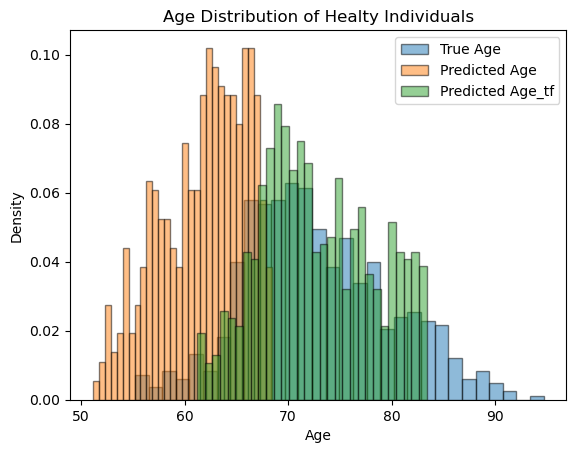

50.805, 17.054, 30.413


In [218]:
age_hist(adni_ages_lists_df)

## 7. Parietal Lobe

In [220]:
num = 6
print(regions[num])

adni_ages_lists_map = {
    'global_true': adni_test_ages[regions[num]]['true_ages'],
    'global_pred': adni_test_ages[regions[num]]['pred_ages'],
    'global_pred_tf': adni_tf_ages[regions[num]]['pred_ages']
}
adni_ages_lists_df = pd.DataFrame(adni_ages_lists_map)
adni_ages_lists_df.describe()

parietal_lobe


global_true  global_pred  global_pred_tf
count   630.000000   630.000000      630.000000
mean     72.764282    62.040780       72.390940
std       7.127740     3.681166        4.957651
min      55.200001    52.353315       62.775924
25%      67.599998    59.398365       68.298418
50%      71.750000    62.525142       71.850293
75%      77.450001    64.831851       76.473415
max      94.699997    68.573851       81.296604

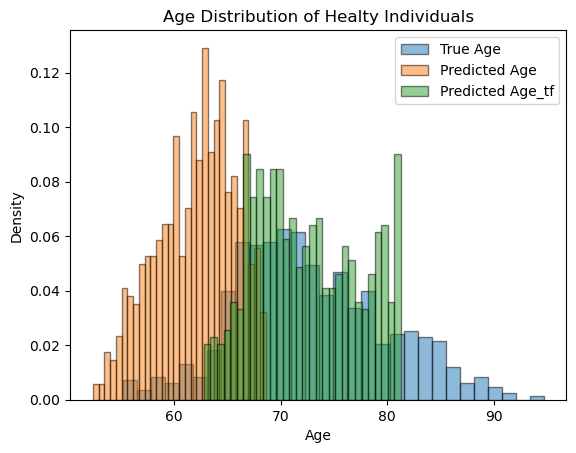

50.805, 13.551, 24.578


In [221]:
age_hist(adni_ages_lists_df)

## 8. Putamen

In [222]:
num = 7
print(regions[num])

adni_ages_lists_map = {
    'global_true': adni_test_ages[regions[num]]['true_ages'],
    'global_pred': adni_test_ages[regions[num]]['pred_ages'],
    'global_pred_tf': adni_tf_ages[regions[num]]['pred_ages']
}
adni_ages_lists_df = pd.DataFrame(adni_ages_lists_map)
adni_ages_lists_df.describe()

putamen


global_true  global_pred  global_pred_tf
count   630.000000   630.000000      630.000000
mean     72.764282    65.654979       72.234399
std       7.127740     2.918462        4.857343
min      55.200001    53.751307       61.826563
25%      67.599998    64.638716       68.716220
50%      71.750000    66.792779       71.164103
75%      77.450001    67.841640       75.636649
max      94.699997    67.963373       82.642790

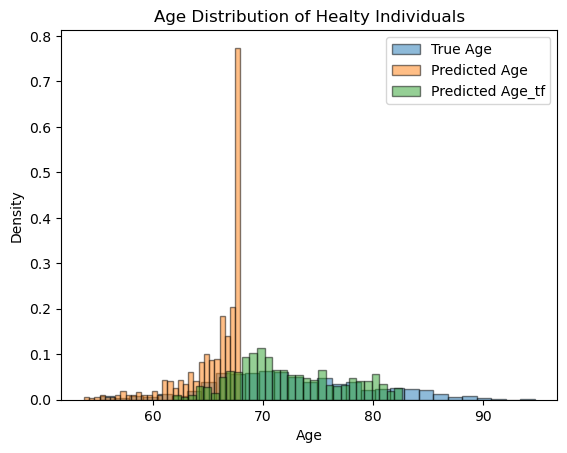

50.805, 8.517, 23.594


In [223]:
age_hist(adni_ages_lists_df)

## 8. Temporal Lobe

In [224]:
num = 8
print(regions[num])

adni_ages_lists_map = {
    'global_true': adni_test_ages[regions[num]]['true_ages'],
    'global_pred': adni_test_ages[regions[num]]['pred_ages'],
    'global_pred_tf': adni_tf_ages[regions[num]]['pred_ages']
}
adni_ages_lists_df = pd.DataFrame(adni_ages_lists_map)
adni_ages_lists_df.describe()

temporal_lobe


global_true  global_pred  global_pred_tf
count   630.000000   630.000000      630.000000
mean     72.764282    62.739308       72.885698
std       7.127740     3.985607        5.522267
min      55.200001    50.667056       61.140240
25%      67.599998    60.048148       68.716228
50%      71.750000    63.435350       71.920909
75%      77.450001    65.924511       77.352860
max      94.699997    68.493137       83.781002

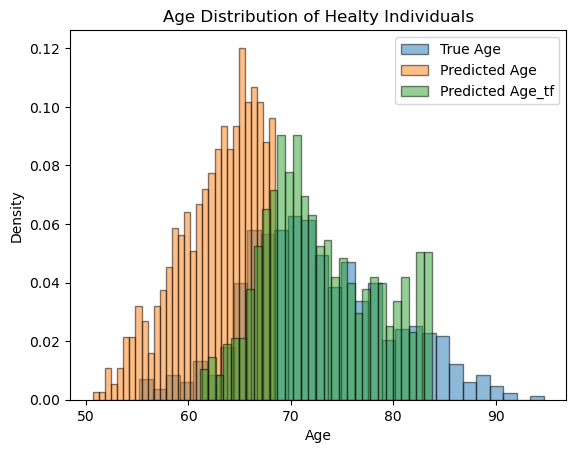

50.805, 15.885, 30.495


In [225]:
age_hist(adni_ages_lists_df)

## Thalamus 

In [226]:
num = 9
print(regions[num])

adni_ages_lists_map = {
    'global_true': adni_test_ages[regions[num]]['true_ages'],
    'global_pred': adni_test_ages[regions[num]]['pred_ages'],
    'global_pred_tf': adni_tf_ages[regions[num]]['pred_ages']
}
adni_ages_lists_df = pd.DataFrame(adni_ages_lists_map)
adni_ages_lists_df.describe()

thalamus


global_true  global_pred  global_pred_tf
count   630.000000   630.000000      630.000000
mean     72.764282    61.419781       72.744908
std       7.127740     3.738640        4.714549
min      55.200001    51.879375       64.661985
25%      67.599998    58.589744       68.880490
50%      71.750000    61.678534       71.474388
75%      77.450001    64.328460       76.989803
max      94.699997    66.792141       81.495525

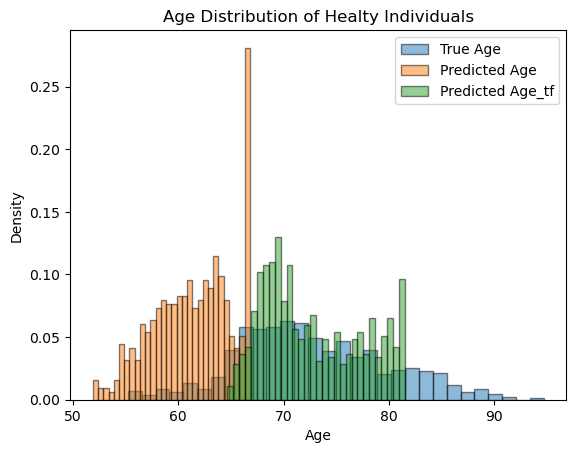

50.805, 13.977, 22.227


In [227]:
age_hist(adni_ages_lists_df)

In [4]:
adni_ages = adni_tf_ages['imgs']['true_ages']
ukb_ages = ukb_test_ages['imgs']['true_ages']

plt.hist(adni_ages, bins=30, alpha=0.5, label='ADNI', density=True, edgecolor='black')
plt.hist(ukb_ages, bins=30, alpha=0.5, label='UKB', density=True, edgecolor='black')
plt.title('Age Distribution of Healthy Individuals')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.show()

NameError: name 'adni_tf_ages' is not defined

In [256]:
pd.DataFrame(ukb_ages).describe()

0
count  25656.000000
mean      60.416004
std        7.382730
min       44.000000
25%       54.750000
50%       61.000000
75%       66.000000
max       77.000000

In [257]:
pd.DataFrame(adni_ages).describe()

0
count  630.000000
mean    72.764282
std      7.127740
min     55.200001
25%     67.599998
50%     71.750000
75%     77.450001
max     94.699997

In [260]:
print(pd.DataFrame(adni_ages).var())

0    50.804676
dtype: float32


In [261]:
print(pd.DataFrame(ukb_ages).var())

0    54.504696
dtype: float32
